In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

##  Loading Dataset

In [2]:
Train_df = pd.read_csv(r"C:\Users\Prince\OneDrive\Documents\FlipRobo Assignments\Project housing\train.csv") # train dataset


In [3]:
Test_df = pd.read_csv(r"C:\Users\Prince\OneDrive\Documents\FlipRobo Assignments\Project housing\test.csv") # test dataset

In [4]:
Train_df.shape # 1168 rows and 81 columns

(1168, 81)

In [5]:
Test_df.shape # 292 rows and 80 columns

(292, 80)

In [6]:
pd.set_option('display.max_columns', None) # to display all the columns

Train_df.head() # displaying first 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [7]:
Train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [8]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Observation

##### 81 columns
##### Target variable SalePrice is of Integer type
#####  Null values in few columns
##### Id column is not relevant for our model

In [9]:
Train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
pd.set_option('display.max_rows', None)
Train_df.nunique() # Checking Unique values of every columns in Train dataset

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [11]:
Test_df.nunique() # Checking Unique values of every columns in Test dataset

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

In [12]:
Train_df['BsmtCond'].unique() # There are 5 different unique values in this column in Train dataset

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [13]:
Test_df['BsmtCond'].unique() # There are only 4 different unique values in this column of Test dataset

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

In [14]:
Train_df.SalePrice.describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Observations
#### The average sale price of a house in our dataset is close to 
#### 181,000, with most of the values falling within the 130,000 to 215,000 range. 

### Dealing with Missing values

In [15]:
Train_df['BsmtQual'].mode()[0]

'TA'

In [16]:
# LotFrontage is float datatype hence filling the NAN values with mean of data
Train_df['LotFrontage'] = Train_df['LotFrontage'].fillna(Train_df['LotFrontage'].mean())
Test_df['LotFrontage'] = Test_df['LotFrontage'].fillna(Test_df['LotFrontage'].mean())

In [17]:
# Maximum data in Alley column is NAN hence we will remove this column
Train_df.drop(['Alley'], axis=1, inplace= True)
Test_df.drop(['Alley'], axis=1, inplace= True)

In [18]:
# BsmtQual is Object datatype hence filling the NAN values with mode of data
Train_df['BsmtQual'] = Train_df['BsmtQual'].fillna(Train_df['BsmtQual'].mode()[0])
Test_df['BsmtQual'] = Test_df['BsmtQual'].fillna(Test_df['BsmtQual'].mode()[0])

In [19]:
# BsmtCond is Object datatype hence filling the NAN values with mode of data
Train_df['BsmtCond'] = Train_df['BsmtCond'].fillna(Train_df['BsmtCond'].mode()[0])
Test_df['BsmtCond'] = Test_df['BsmtCond'].fillna(Test_df['BsmtCond'].mode()[0])

In [20]:
# BsmtExposure is Object datatype hence filling the NAN values with mode of data
Train_df['BsmtExposure'] = Train_df['BsmtExposure'].fillna(Train_df['BsmtExposure'].mode()[0])
Test_df['BsmtExposure'] = Test_df['BsmtExposure'].fillna(Test_df['BsmtExposure'].mode()[0])

In [21]:
# BsmtFinType1 is Object datatype hence filling the NAN values with mode of data
Train_df['BsmtFinType1'] = Train_df['BsmtFinType1'].fillna(Train_df['BsmtFinType1'].mode()[0])
Test_df['BsmtFinType1'] = Test_df['BsmtFinType1'].fillna(Test_df['BsmtFinType1'].mode()[0])

In [22]:
# BsmtFinType2 is Object datatype hence filling the NAN values with mode of data
Train_df['BsmtFinType2'] = Train_df['BsmtFinType2'].fillna(Train_df['BsmtFinType2'].mode()[0])
Test_df['BsmtFinType2'] = Test_df['BsmtFinType2'].fillna(Test_df['BsmtFinType2'].mode()[0])

In [23]:
# FireplaceQu is Object datatype hence filling the NAN values with mode of data
Train_df['FireplaceQu'] = Train_df['FireplaceQu'].fillna(Train_df['FireplaceQu'].mode()[0])
Test_df['FireplaceQu'] = Test_df['FireplaceQu'].fillna(Test_df['FireplaceQu'].mode()[0])

In [24]:
# GarageType is Object datatype hence filling the NAN values with mode of data
Train_df['GarageType'] = Train_df['GarageType'].fillna(Train_df['GarageType'].mode()[0])
Test_df['GarageType'] = Test_df['GarageType'].fillna(Test_df['GarageType'].mode()[0])

In [25]:
# GarageYrBl is float datatype hence filling the NAN values with mean of data
Train_df['GarageYrBlt'] = Train_df['GarageYrBlt'].fillna(Train_df['GarageYrBlt'].mean())
Test_df['GarageYrBlt'] = Test_df['GarageYrBlt'].fillna(Test_df['GarageYrBlt'].mean())

In [26]:
# GarageFinish is object datatype hence filling the NAN values with mode of data
Train_df['GarageFinish'] = Train_df['GarageFinish'].fillna(Train_df['GarageFinish'].mode()[0])
Test_df['GarageFinish'] = Test_df['GarageFinish'].fillna(Test_df['GarageFinish'].mode()[0])

In [27]:
# GarageQual is object datatype hence filling the NAN values with mode of data
Train_df['GarageQual'] = Train_df['GarageQual'].fillna(Train_df['GarageQual'].mode()[0])
Test_df['GarageQual'] = Test_df['GarageQual'].fillna(Test_df['GarageQual'].mode()[0])

In [28]:
# GarageCond is object datatype hence filling the NAN values with mode of data
Train_df['GarageCond'] = Train_df['GarageCond'].fillna(Train_df['GarageCond'].mode()[0])
Test_df['GarageCond'] = Test_df['GarageCond'].fillna(Test_df['GarageCond'].mode()[0])

In [29]:
# Maximum data in PoolQC column is NAN hence we will remove this column
Train_df.drop(['PoolQC'], axis=1, inplace= True)
Test_df.drop(['PoolQC'], axis=1, inplace= True)

In [30]:
# Maximum data in Fence column is NAN hence we will remove this column
Train_df.drop(['Fence'], axis=1, inplace= True)
Test_df.drop(['Fence'], axis=1, inplace= True)

In [31]:
# Maximum data in MiscFeature column is NAN hence we will remove this column
Train_df.drop(['MiscFeature'], axis=1, inplace= True)
Test_df.drop(['MiscFeature'], axis=1, inplace= True)

In [32]:
# Id column is not helpful in model building hence we will remove this column
Train_df.drop(['Id'], axis=1, inplace= True)
Test_df.drop(['Id'], axis=1, inplace= True)

In [33]:
Train_df['MasVnrArea'] = Train_df['MasVnrArea'].fillna(Train_df['MasVnrArea'].mean())
Test_df['MasVnrArea'] = Test_df['MasVnrArea'].fillna(Test_df['MasVnrArea'].mean())

In [34]:
Train_df['MasVnrType'] = Train_df['MasVnrType'].fillna(Train_df['MasVnrType'].mode()[0])
Test_df['MasVnrType'] = Test_df['MasVnrType'].fillna(Test_df['MasVnrType'].mode()[0])

In [35]:
# Train_df.drop(['MasVnrArea'], axis=1, inplace= True)
# Test_df.drop(['MasVnrArea'], axis=1, inplace= True)

In [36]:
# Train_df.drop(['MasVnrType'], axis=1, inplace= True)
# Test_df.drop(['MasVnrType'], axis=1, inplace= True)

In [37]:
Train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [38]:
Train_df['FireplaceQu'].value_counts()

Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [39]:
Train_df.shape

(1168, 76)

In [40]:
Test_df.shape

(292, 75)

In [41]:
aggregate_df = pd.DataFrame()
aggregate_df = aggregate_df.append(Train_df)

In [42]:
aggregate_df = aggregate_df.append(Test_df)

In [43]:
aggregate_df.shape

(1460, 76)

In [44]:
aggregate_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL    70.988470     4928   Pave      IR1         Lvl   
1             20       RL    95.000000    15865   Pave      IR1         Lvl   
2             60       RL    92.000000     9920   Pave      IR1         Lvl   
3             20       RL   105.000000    11751   Pave      IR1         Lvl   
4             20       RL    70.988470    16635   Pave      IR1         Lvl   
5             60       RL    58.000000    14054   Pave      IR1         Lvl   
6             20       RL    70.988470    11341   Pave      IR1         Lvl   
7             20       RL    88.000000    13125   Pave      Reg         Lvl   
8             20       RL    70.000000     9170   Pave      Reg         Lvl   
9             50       RL    80.000000     8480   Pave      Reg         Lvl   
10            50       RM    50.000000     8600   Pave      Reg         Bnk   
11            60       RL    44.000000     9548   Pave      IR1         Lvl   
12            20       RL   129.000000     9196   Pave      IR1         Lvl   
13            20       RL    80.000000     8892   Pave      IR1         Lvl   
14            50       RL    59.000000    16466   Pave      IR1         Lvl   
15            70       RL    55.000000    10592   Pave      Reg         Lvl   
16            30       RM    70.988470     5890   Pave      Reg         Lvl   
17            20       RL    64.000000     7314   Pave      Reg         Lvl   
18            20       RL    70.988470     7917   Pave      IR1         Lvl   
19           160       RM    24.000000     2016   Pave      Reg         Lvl   
20            60       RL    80.000000    12435   Pave      Reg         Lvl   
21            85       RL    70.000000     8445   Pave      Reg         Lvl   
22            20       RL    68.000000     9717   Pave      Reg         Lvl   
23            20       RL    70.988470    10659   Pave      IR1         Lvl   
24            20       RL    71.000000     9230   Pave      Reg         Lvl   
25            20       RL    70.988470    21000   Pave      Reg         Bnk   
26            30       RL    70.988470    25339   Pave      Reg         Lvl   
27            20       RL    88.000000    11394   Pave      Reg         Lvl   
28            45       RM    58.000000     6380   Pave      Reg         Lvl   
29            70       RL    74.000000    11988   Pave      IR1         HLS   
30           120       RL    61.000000     7658   Pave      Reg         Lvl   
31            60       RM    60.000000     3378   Pave      Reg         HLS   
32            90       RL    70.988470    18890   Pave      IR1         Lvl   
33            50       RM    70.988470    12358   Pave      IR1         Lvl   
34            60       RL    70.988470    14762   Pave      IR2         Lvl   
35            20       RL   120.000000    10356   Pave      Reg         Lvl   
36            20       RL    80.000000    10400   Pave      Reg         Lvl   
37            20       RL    84.000000    12615   Pave      Reg         Lvl   
38            85       RL    70.988470     7540   Pave      IR1         Lvl   
39            40       RM    50.000000     9100   Pave      Reg         Lvl   
40            20       RL   141.000000    31770   Pave      IR1         Lvl   
41            20       RL    70.000000    13300   Pave      Reg         Lvl   
42           160       FV    30.000000     3180   Pave      Reg         Lvl   
43           160       RM    24.000000     2522   Pave      Reg         Lvl   
44            80       RL    65.000000     8385   Pave      Reg         Lvl   
45            20       RL    76.000000     8314   Pave      Reg         Lvl   
46            60       RL    60.000000     8123   Pave      IR1         Lvl   
47            20       RM   100.000000    12000   Pave      Reg         Lvl   
48            20       RL    50.000000     5000   Pave      Reg         Low   
49            20       RL    70.000000     7931   Pave  

In [45]:
for column in aggregate_df.columns:
    if aggregate_df[column].dtype == object:
        final_df = pd.get_dummies(aggregate_df, drop_first=True)

In [46]:
final_df.shape

(1460, 237)

In [47]:
final_df = final_df.loc[:,~final_df.columns.duplicated()] # Removing the duplicate entries from dataframe(if any)

In [48]:
final_df.shape # No duplicate enteries

(1460, 237)

In [49]:
df_Train = final_df.iloc[:1168,:]
df_Test = final_df.iloc[1168:,:]

In [50]:
df_Train.shape

(1168, 237)

In [51]:
df_Test.shape

(292, 237)

In [52]:
df_Train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
SalePrice                0
M

In [53]:
df_Test.drop(['SalePrice'], axis=1, inplace= True) # Removing salesprice from our test dataset

Skew is: 1.953877705368286


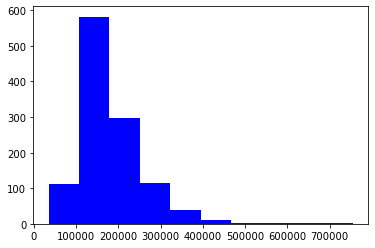

In [54]:
print ("Skew is:", df_Train.SalePrice.skew())
plt.hist(df_Train.SalePrice, color='blue')
plt.show()

Skew is: 0.07359740998337982


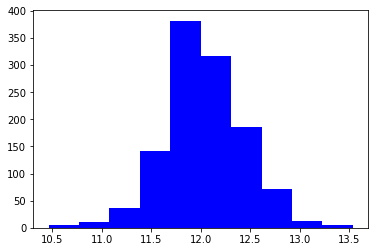

In [55]:
target = np.log(df_Train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [56]:
# Dividing dataframe into target and input variables 
X = df_Train.drop(['SalePrice'], axis = 1)
y = df_Train['SalePrice']

In [57]:
from sklearn.preprocessing import RobustScaler # Scaling our feature data
scaler = RobustScaler()
scaler.fit_transform(X)

array([[ 1.4       ,  0.        , -1.17989214, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  1.24735223,  1.62878788, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  1.09150807,  0.10208012, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.2       , -2.44095946, -1.85991269, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4       , -1.09031011, -0.26258346, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        , -0.42668207, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
X = scaler.transform(X)

## Cross-validation

In [59]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score



def test_model(model, X_train = X, y_train = y):
    cv = KFold(n_splits=3, shuffle=True, random_state= 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv = cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

## Linear Regression

In [60]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
test_model(lr)

[0.645137050324733]

In [61]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.7954556441846222]

In [62]:
from sklearn.linear_model import LassoCV
lasscv = LassoCV(alphas = None, normalize = True)
lasscv.fit(X,y)
alpha = lasscv.alpha_ # finding alpha 
alpha

25.88176881841803

In [63]:
lasso = linear_model.Lasso(alpha)
test_model(lasso)

[0.7852362389853914]

## Decision Tree regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=22)
test_model(dt_reg)

[0.7169041676577111]

## Random-forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state= 51)
test_model(rf_reg)

[0.8489818247536354]

## Bagging and Boosting

In [66]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss ='ls', random_state=51)

In [67]:
test_model(br_reg)

[0.8489565553181538]

In [68]:
test_model(gb_reg)

[0.8770100304596457]

## XGBOOST

In [69]:
!pip3 install xgboost

In [70]:
import xgboost
xgb_reg = xgboost.XGBRegressor(bbooster = 'gbtree', random_state = 51)
test_model(xgb_reg)

[21:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bbooster" } might not be used.

  This may not be accurate due to some parameters are only used in language

[0.8410606372339066]

In [71]:
classifier = xgboost.XGBRegressor()
classifier.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
import xgboost
regressor = xgboost.XGBRegressor()

In [73]:
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]

## Hyperparameter optimization

In [74]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth =[2,3,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]

# define the grid of hyperparameters to search
Hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

In [79]:
from sklearn.model_selection import RandomizedSearchCV

#set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator = regressor,
                              param_distributions = Hyperparameter_grid, 
                              cv = 5, n_iter=50, 
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5, 
                              return_train_score = True,
                              random_state=42)

In [80]:
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  8.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [81]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
regressor.fit(X,y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [98]:
X_test = df_Test.copy()

In [99]:
scaler = RobustScaler()
scaler.fit_transform(X_test)
X_test = scaler.transform(X_test)

In [100]:
y_pred=regressor.predict(X_test)